# 1. Spatially constrained colorization

-

## Load Packages

In [1]:
import anndata
import spaco2

import scanpy as sc

import matplotlib
import seaborn as sns

import numpy as np

## Load Data
**蝾螈**

In [2]:
# Load binning data
adata_cellbin = anndata.read("/DATA/User/jingzh/02.Projects/Tmp/cell_seg_ot/axolotl/15DPI_1_left.h5ad")
adata_cellbin.obs['annotation'] = adata_cellbin.obs['Annotation'].copy()
adata_cellbin

AnnData object with n_obs × n_vars = 4514 × 23331
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'Celltype', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation', 'annotation'
    var: 'Gene'
    uns: 'Injury_15DPI_rep2_FP200000266TR_E2', '__type', 'angle_dict'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

## Basic colorization functions

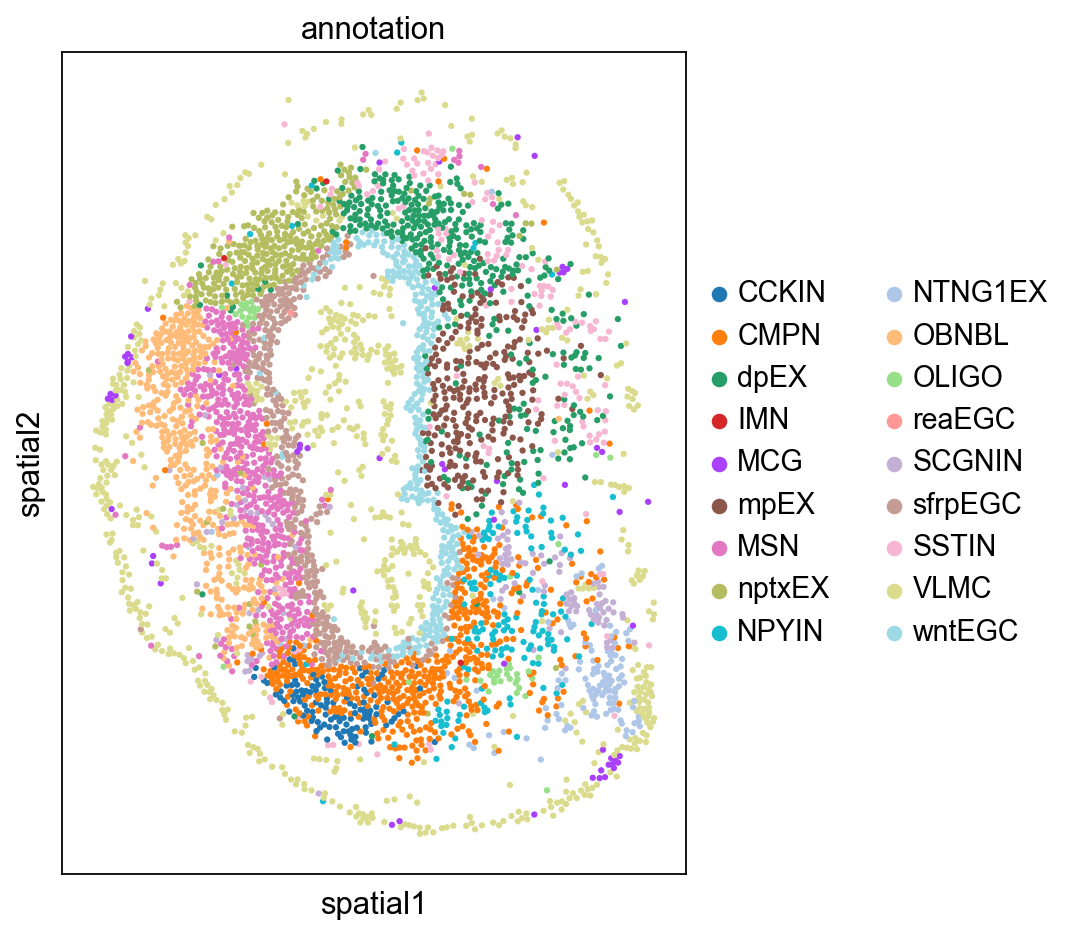

In [3]:
# Default colorization
sc.set_figure_params(figsize=(5,7), facecolor="white")
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35)

In [4]:
# Save a copy of default color mapping
if 'annotation_colors_bkp' not in adata_cellbin.uns_keys():
    adata_cellbin.uns['annotation_colors_bkp'] = adata_cellbin.uns['annotation_colors'].copy()

### 01. Spaco with a given palette

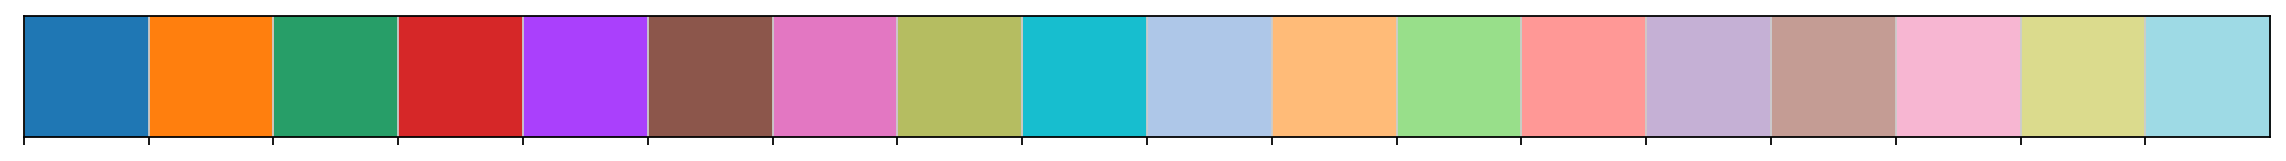

In [5]:
# Get the above (default) color palette
palette = adata_cellbin.uns['annotation_colors_bkp'].copy()
sns.palplot(palette)

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...
|-----------> Solving TSP for cluster graph...
|-----------> Solving TSP for color graph...
|-----> Optimizing cluster color mapping...


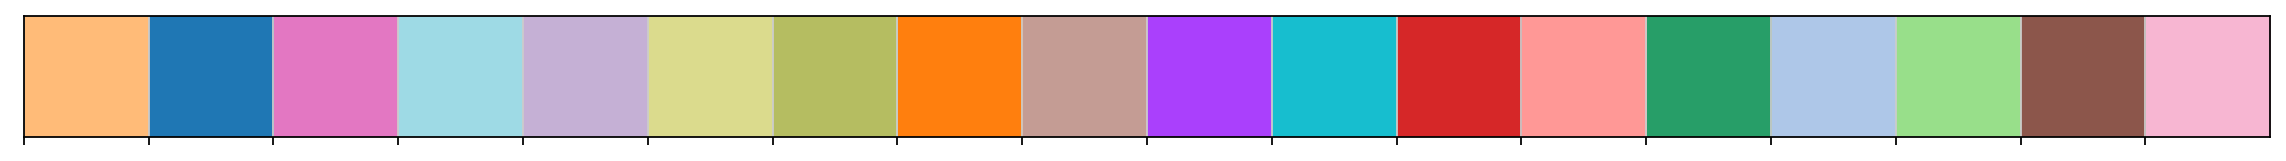

In [6]:
color_mapping = spaco2.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    palette=palette,
    radius=1, #does not matter
    solver="exact", #可重复，但慢
    #solver="heuristic", #不可重复，但快
)
sns.palplot(list(color_mapping.values()))

In [7]:
# Order colors by categories in adata
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['annotation_colors'] = list(color_mapping.values())

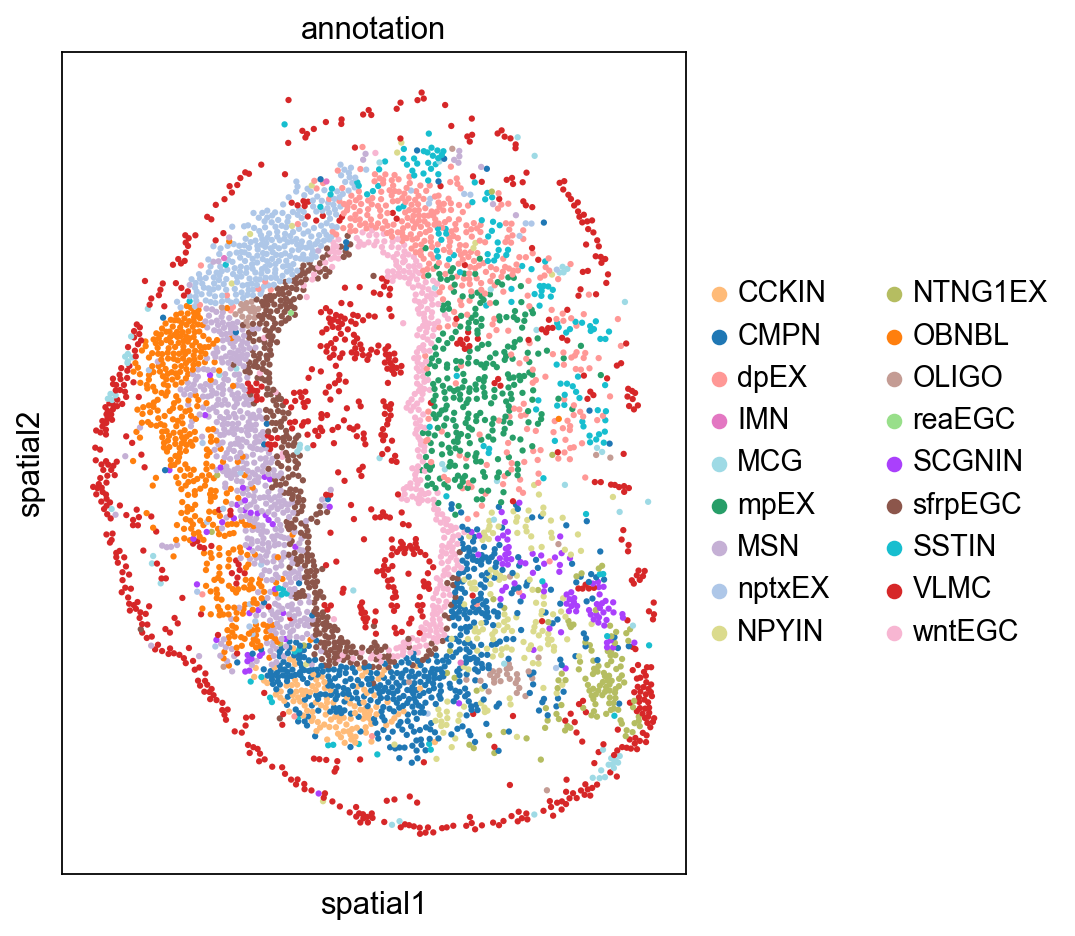

In [8]:
# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35)

### 02. Spaco with an image

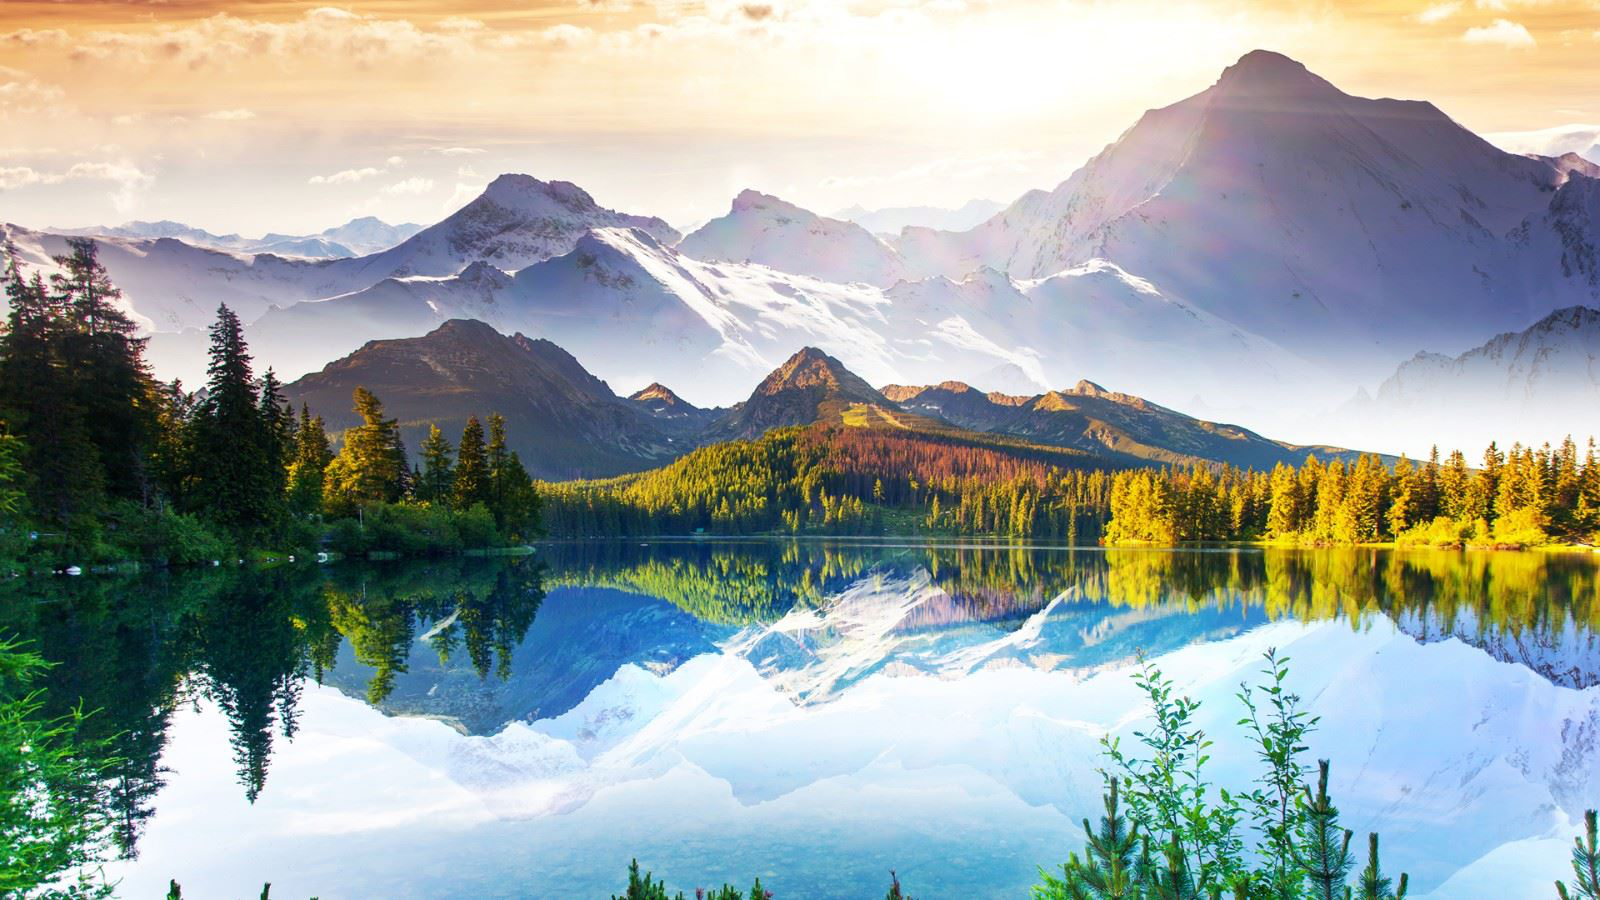

In [9]:
from PIL import Image

img = Image.open("/DATA/User/jingzh/02.Projects/spatial_coloring/data/31054d3ef49b3c4683f2fb74f12d0b05.jpg").convert("RGB")
img

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> `palette` not provided.
|-----------> Using `image palette`...
|-----------> Drawing appropriate colors from provided image...
|-----------------> Extracting color bins...
|-----------------> Initiating palette...
|-----------------> Optimizing extracted palette...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...
|-----------> Solving TSP for cluster graph...
|-----------> Solving TSP for color graph...
|-----> Optimizing cluster color mapping...


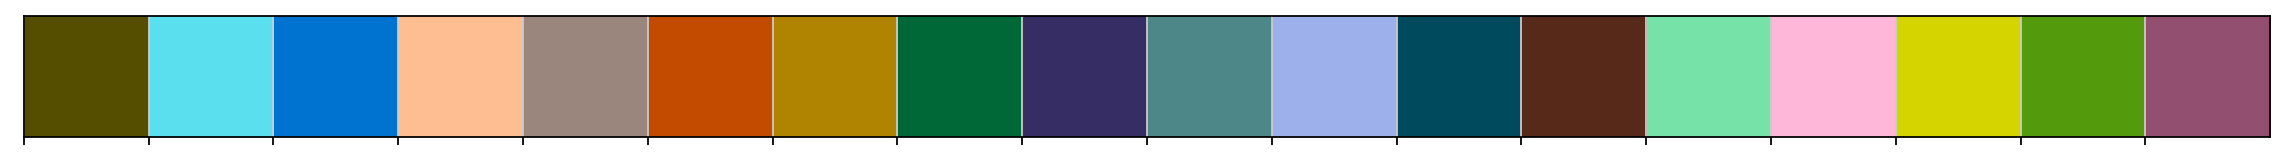

In [10]:
color_mapping = spaco2.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    image_palette=img,
    radius=1, #does not matter
    solver="exact", #可重复，但慢
    #solver="heuristic", #不可重复，但快
)
sns.palplot(list(color_mapping.values()))

In [11]:
# Order colors by categories in adata
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['annotation_colors'] = list(color_mapping.values())

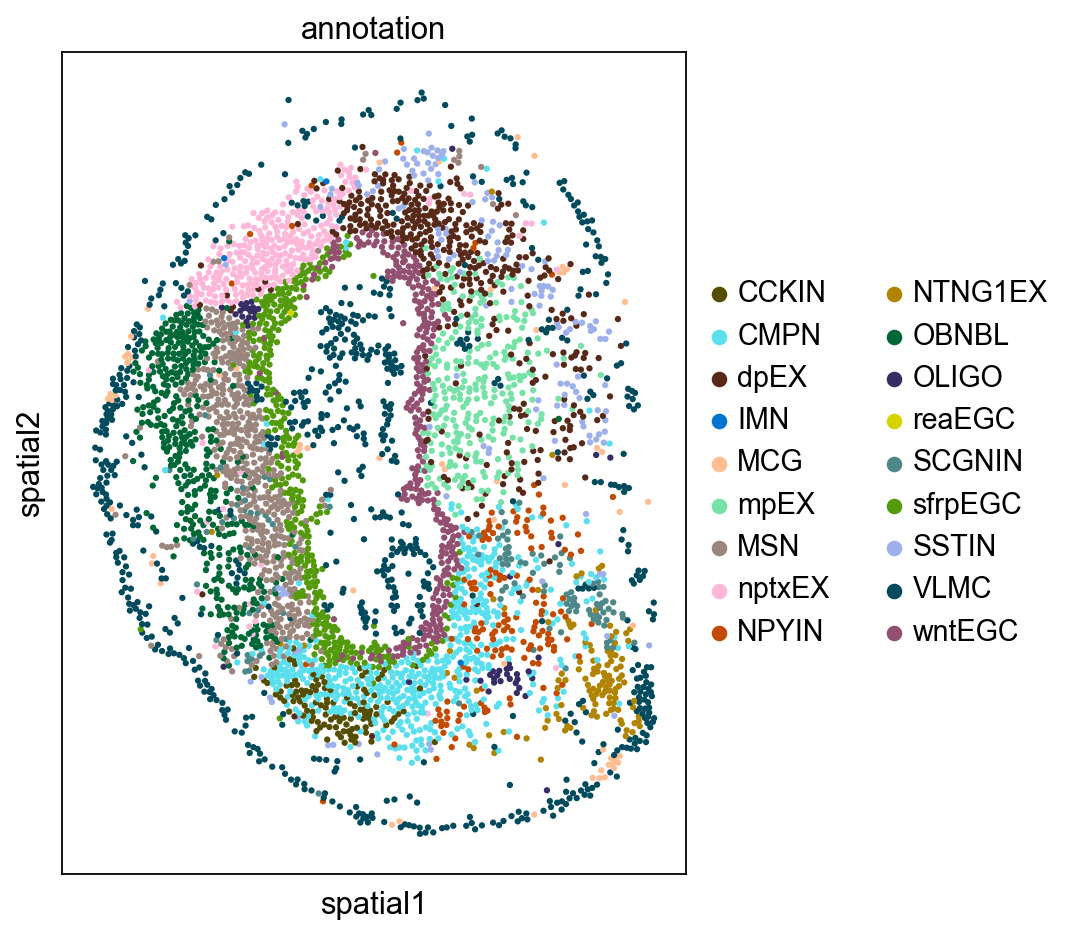

In [12]:
# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35)

### 03. Spaco automatically

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


2023-02-13 15:36:13.077763: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/jingzh/.conda/envs/spateo_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


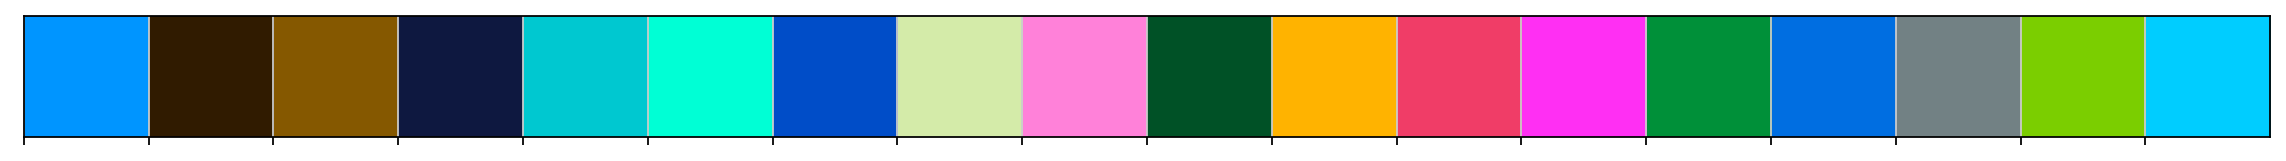

In [13]:
color_mapping = spaco2.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=20,# does not matter
    embed_kwargs={"transformation": "umap"},
)
sns.palplot(list(color_mapping.values()))

In [14]:
# Order colors by categories in adata
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['annotation_colors'] = list(color_mapping.values())

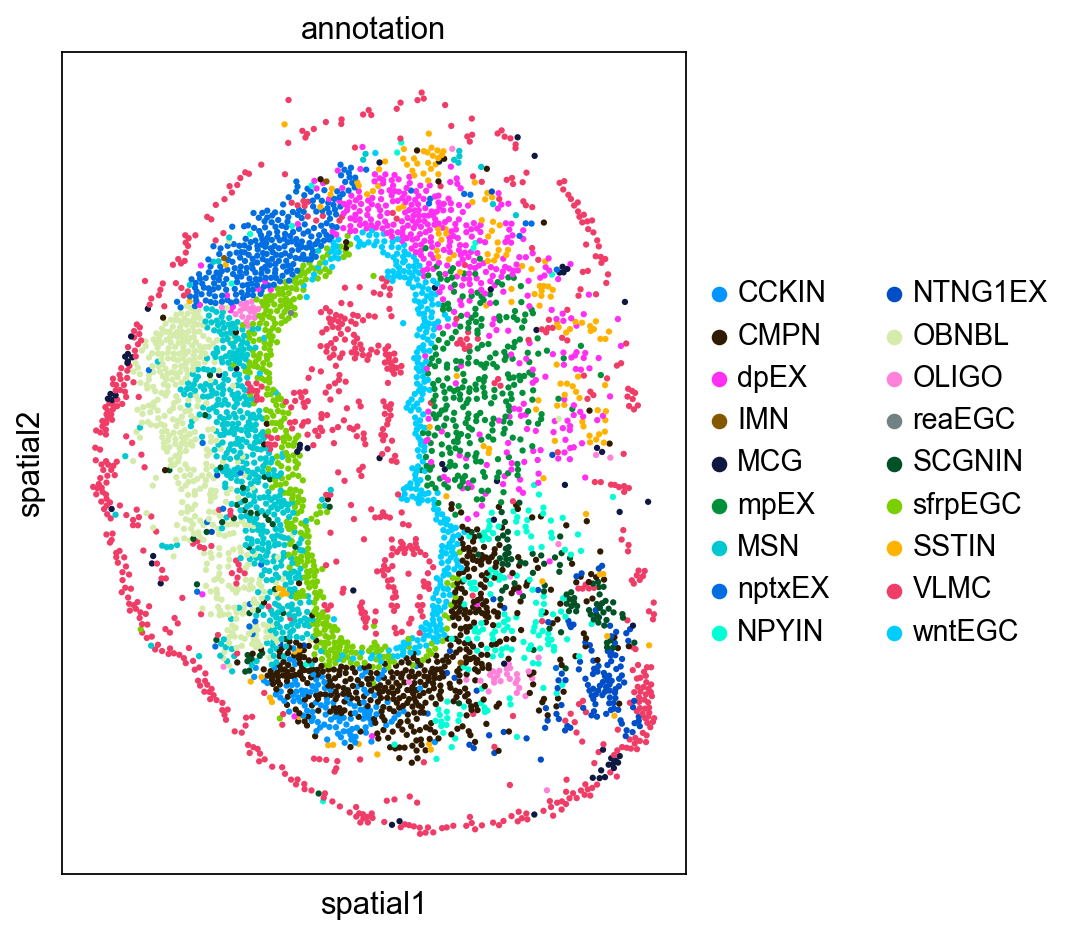

In [15]:
# Spaco colors
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35)

## Between Muti-slice

### 01. align using annotations

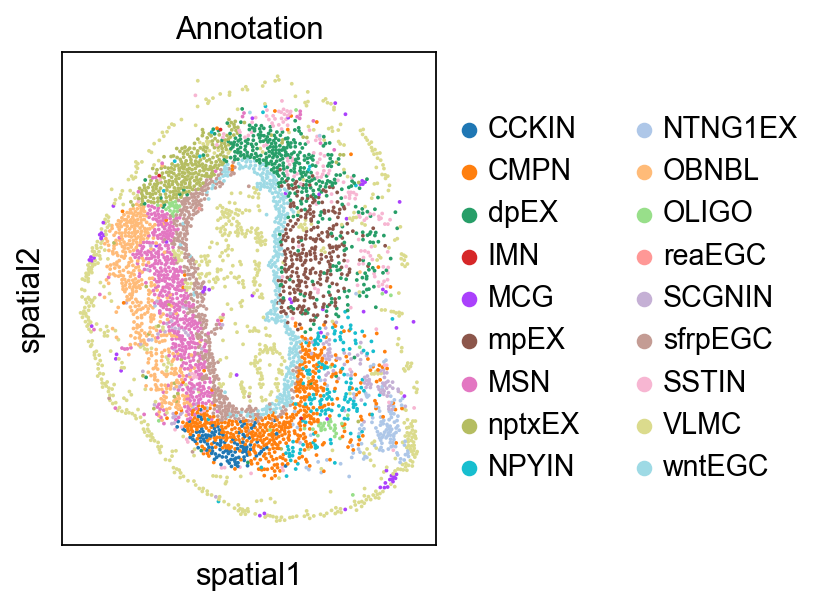

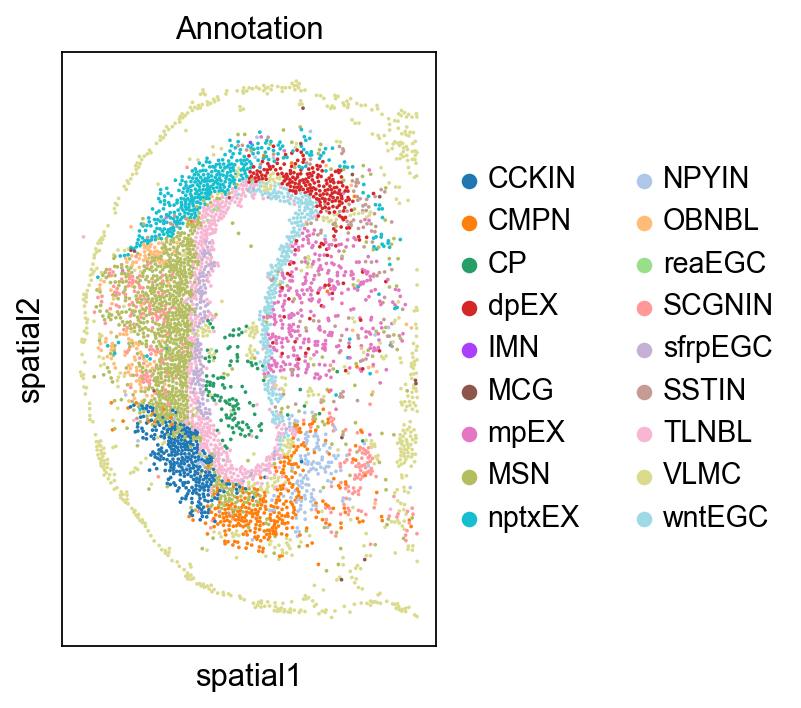

In [16]:
# Default colorization
adata_cellbin2 = anndata.read("/DATA/User/jingzh/02.Projects/Tmp/cell_seg_ot/axolotl/10DPI_1_left.h5ad")
sc.set_figure_params(figsize=(3,5), facecolor="white")
sc.pl.spatial(adata_cellbin, color="Annotation", spot_size=35)
sc.pl.spatial(adata_cellbin2, color="Annotation", spot_size=35)

|-----> Calculating cluster distance graph for slice 0... 
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> Calculating cluster distance graph for slice 1... 
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> Merging cluster distance graph... 
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spateo_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


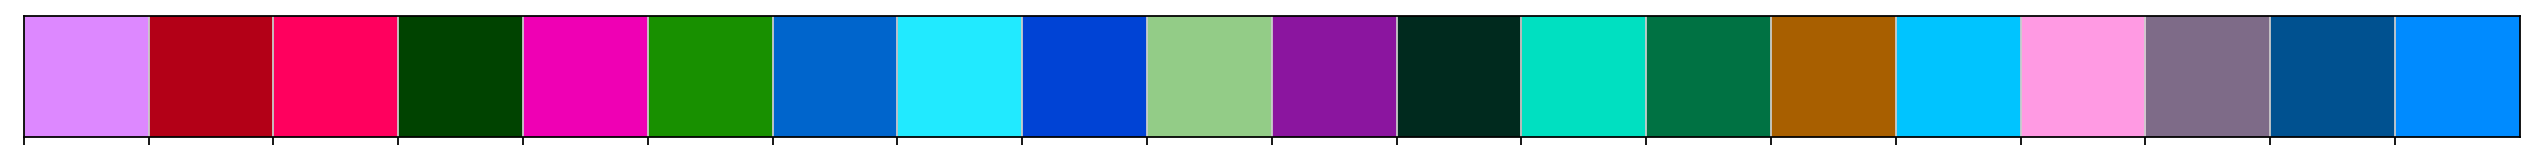

In [17]:
color_mapping = spaco2.colorize_mutiple_slices(
    adatas=[adata_cellbin, adata_cellbin2],
    cluster_key='Annotation',
    slice_mapping="annotation",
    spatial_key="spatial",
    radius=1, #does not matter
)
sns.palplot(list(color_mapping.values()))

In [18]:
# Order colors by categories in adata
color_mapping_1 = {k: color_mapping[k] for k in adata_cellbin.obs['Annotation'].cat.categories}
color_mapping_2 = {k: color_mapping[k] for k in adata_cellbin2.obs['Annotation'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['Annotation_colors'] = list(color_mapping_1.values())
adata_cellbin2.uns['Annotation_colors'] = list(color_mapping_2.values())

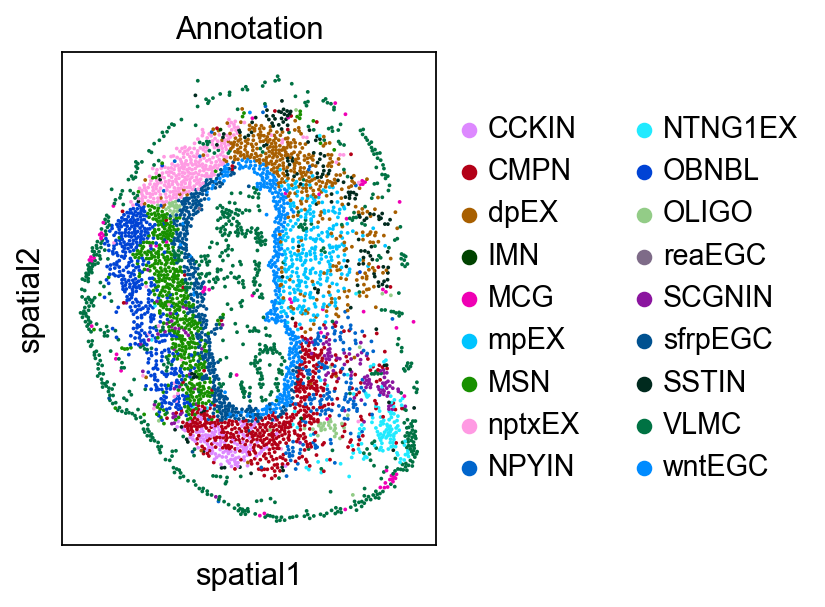

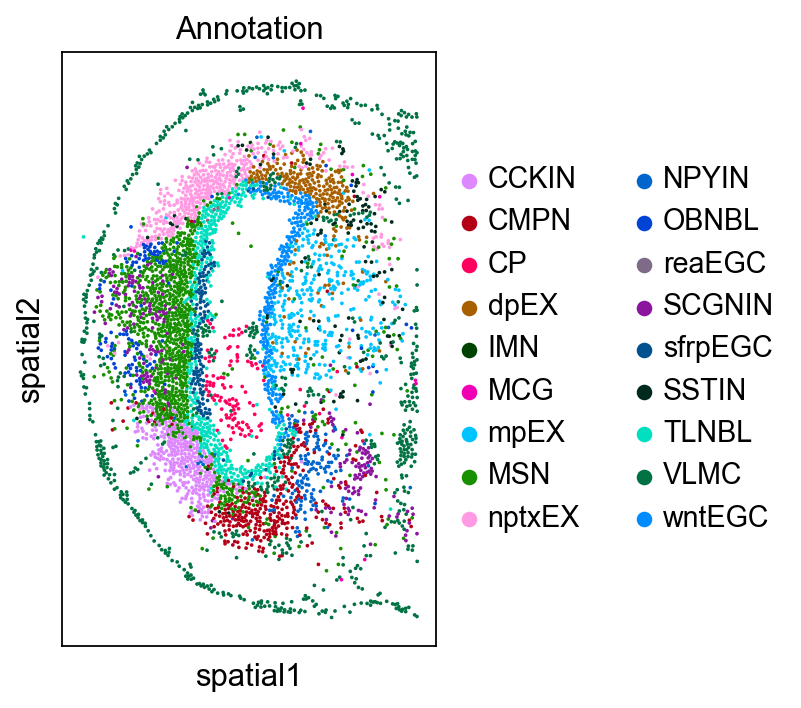

In [19]:
# Spaco colorization
sc.pl.spatial(adata_cellbin, color="Annotation", spot_size=35)
sc.pl.spatial(adata_cellbin2, color="Annotation", spot_size=35)

### 02. align using expression

In [20]:
## Under development

## Between Clustering results

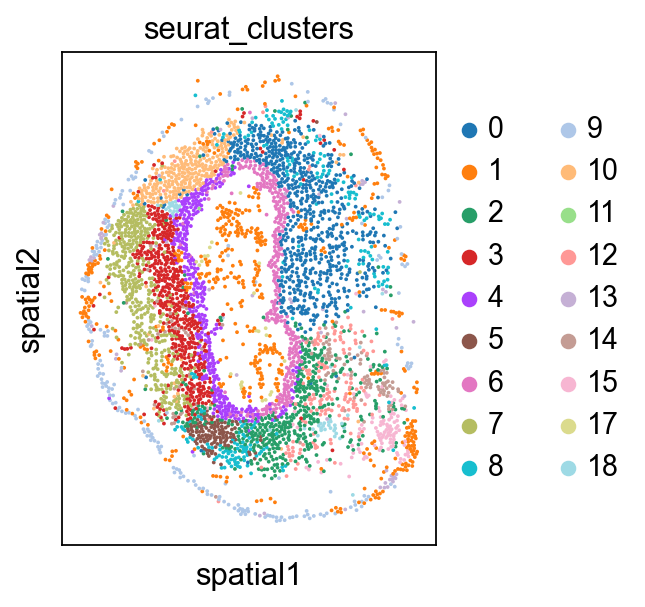

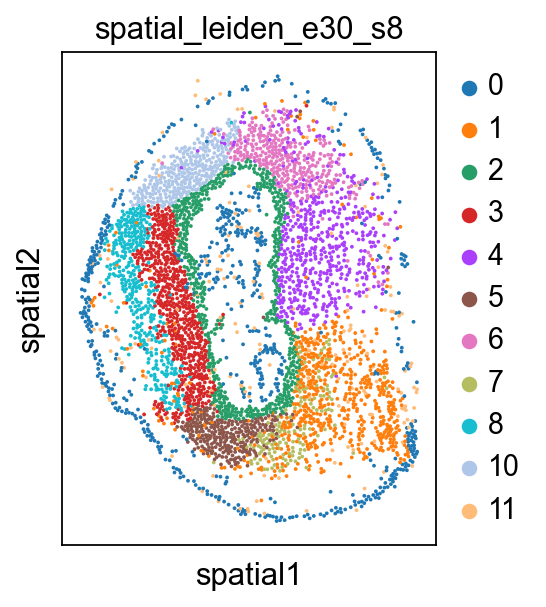

In [21]:
# Default colorization
sc.set_figure_params(figsize=(3,5), facecolor="white")
sc.pl.spatial(adata_cellbin, color="seurat_clusters", spot_size=35)
sc.pl.spatial(adata_cellbin, color="spatial_leiden_e30_s8", spot_size=35)

|-----> Mapping clusters between runs...
|-----------------> <insert> 'seurat_clusters_spaco2' to obs in AnnData Object.
|-----------> Mapping run 1 to run 0...
|-----------------> <insert> 'spatial_leiden_e30_s8_spaco2' to obs in AnnData Object.
|-----------> Mapped cluster name added to `adata.obs['***_spaco2']`. Result color mapping will base on new cluster name.
|-----> Calculating cluster distance graph for run 0... 
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> Calculating cluster distance graph for run 1... 
|-----------> Calculating cell neighborhood...
|-----------> Constructing cluster distance graph...
|-----> Merging cluster distance graph... 
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spateo_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


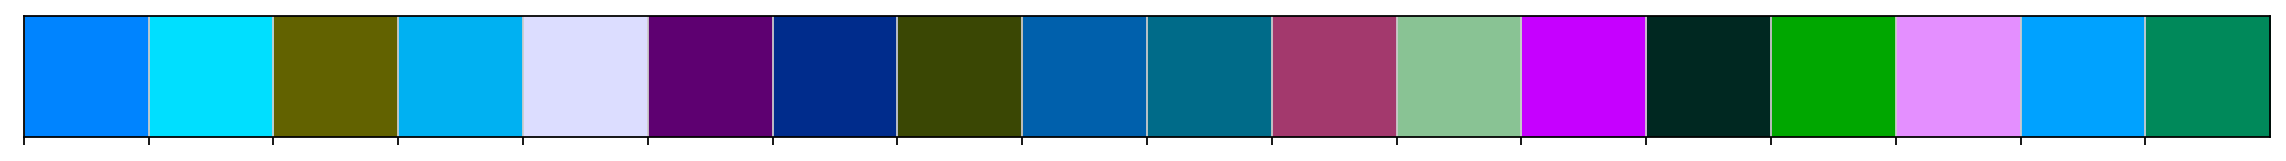

In [22]:
color_mapping = spaco2.colorize_mutiple_runs(
    adata=adata_cellbin,
    cluster_keys=['seurat_clusters', 'spatial_leiden_e30_s8'],
    spatial_key="spatial",
    radius=1, #does not matter
)
sns.palplot(list(color_mapping.values()))

In [23]:
# Order colors by categories in adata
color_mapping_1 = {k: color_mapping[k] for k in adata_cellbin.obs['seurat_clusters_spaco2'].cat.categories}
color_mapping_2 = {k: color_mapping[k] for k in adata_cellbin.obs['spatial_leiden_e30_s8_spaco2'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['seurat_clusters_spaco2_colors'] = list(color_mapping_1.values())
adata_cellbin.uns['spatial_leiden_e30_s8_spaco2_colors'] = list(color_mapping_2.values())

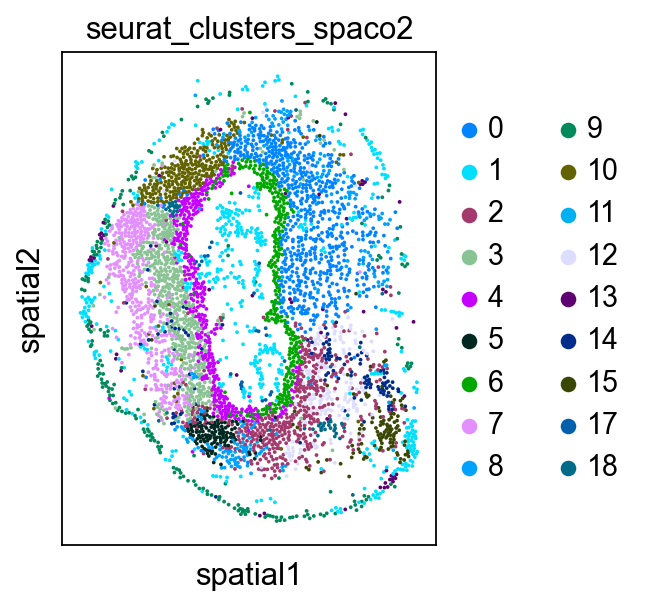

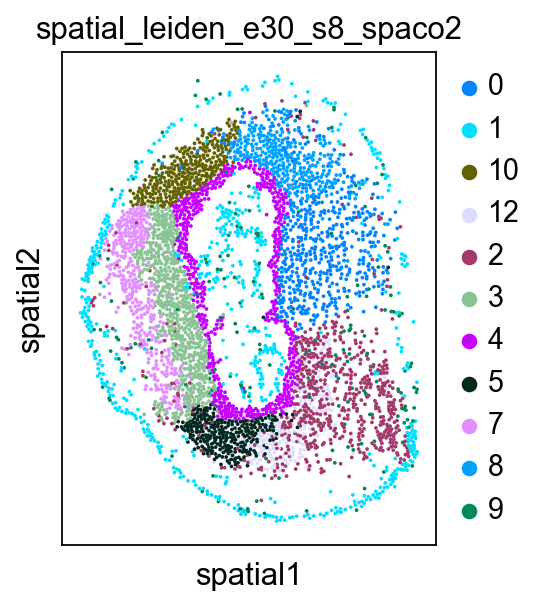

In [24]:
# Spaco colorization
sc.pl.spatial(adata_cellbin, color="seurat_clusters_spaco2", spot_size=35)
sc.pl.spatial(adata_cellbin, color="spatial_leiden_e30_s8_spaco2", spot_size=35)